In [37]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [38]:
n_task_per_file = 20
n_files = 10
base_dir = "toy_eg_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [39]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [40]:
coverage_df

,0.5,1,2,Tree val,Naive
0,1.000000,0.857143,0.666667,1.0,1.0
1,0.833333,0.833333,0.714286,1.0,1.0
2,1.000000,1.000000,1.000000,0.5,1.0
3,1.000000,1.000000,1.000000,1.0,1.0
4,1.000000,1.000000,1.000000,1.0,1.0
...,...,...,...,...,...
15,1.000000,1.000000,0.857143,1.0,1.0
16,1.000000,0.714286,1.000000,1.0,1.0
17,0.857143,0.833333,0.833333,1.0,1.0
18,0.857143,0.857143,0.857143,1.0,1.0


In [41]:
length_df

,0.5,1,2,Tree val,Naive
0,4.501850,4.797272,6.412902,12.811456,3.196710
1,6.904604,3.687466,5.826414,11.129336,2.849592
2,4.718633,5.710018,3.904361,50.769189,2.808232
3,4.825543,30.236840,3.966550,5.750580,3.213570
4,4.368280,5.819301,4.303696,2.876727,2.913335
...,...,...,...,...,...
15,8.202227,5.651107,10.346596,6.073178,2.828077
16,3.800109,6.409001,9.224133,9.630611,2.867262
17,4.499726,3.444206,5.785203,6.600450,3.213570
18,5.214834,3.894894,5.730990,4.245245,2.880925


In [42]:
MSE_df

,0.5,1,2,Tree val,Naive
0,1.462167,1.420845,1.409466,1.226912,1.226912
1,2.340070,2.157225,1.803079,1.848013,1.848013
2,1.777333,1.818062,1.655911,1.794981,1.794981
3,1.436549,1.763527,1.651103,1.499216,1.499216
4,1.518050,1.594421,1.594140,1.139002,1.139002
...,...,...,...,...,...
15,1.742106,1.665841,1.766909,1.637213,1.637213
16,1.483560,1.700598,1.671865,1.555795,1.555795
17,1.365322,1.212161,1.263125,1.062350,1.062350
18,1.435361,1.205504,1.631626,1.183045,1.183045


In [59]:
def boxplots(dfs, metrics):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        sns.boxplot(data=df, ax=axes[i])
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            axes[i].plot(j, mean, marker='^', color='red', markersize=10)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
        elif metric == "Length":
            axes[i].set_ylim(0,100)
        elif metric == "MSE":
            axes[i].set_ylim(0,3)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 0.5         0.964226
1           0.948690
2           0.880310
Tree val    0.919667
Naive       1.000000
dtype: float64
Length :
 0.5          6.701583
1            6.947461
2            8.285844
Tree val    10.457891
Naive        2.906896
dtype: float64
MSE :
 0.5         1.503440
1           1.507085
2           1.513959
Tree val    1.373093
Naive       1.373093
dtype: float64


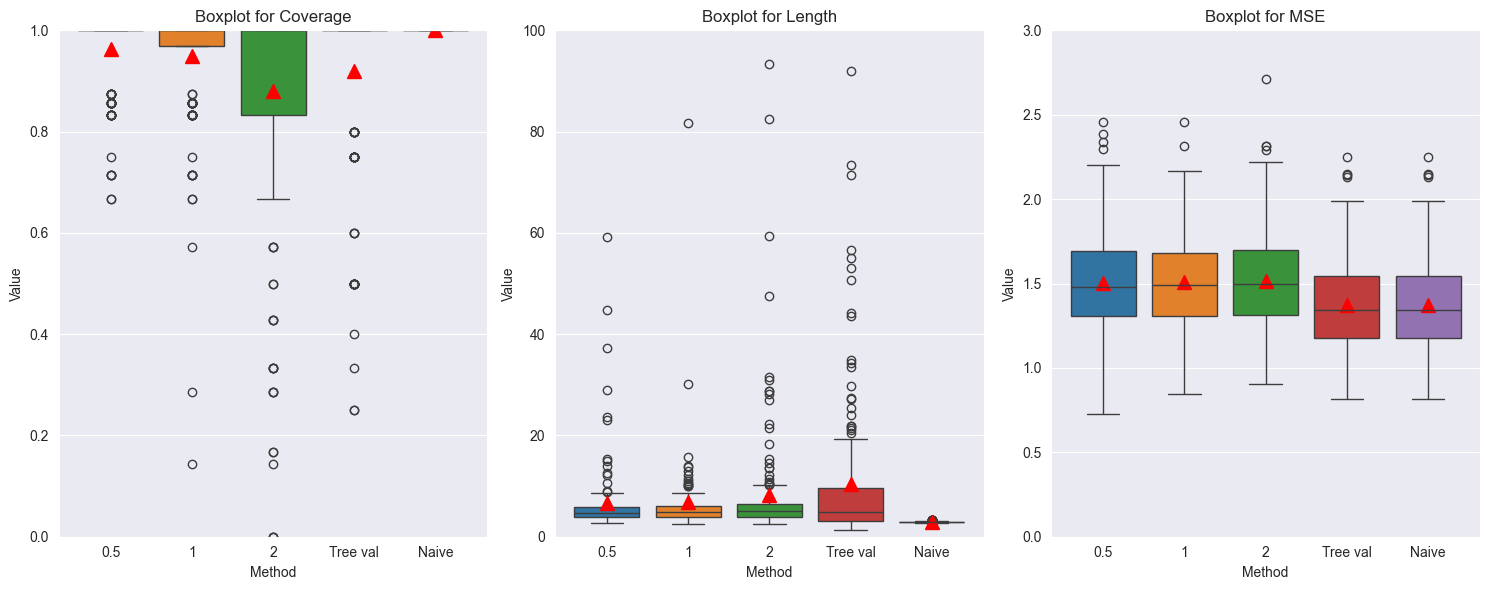

In [60]:
boxplots(dfs=[coverage_df, length_df, MSE_df], metrics=["Coverage", "Length", "MSE"])